In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline 

from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

In [6]:
dfs = pd.read_csv('/Users/kristensu/dropbox/GA-DSI/DSI-copy/curriculum/week-03/5.1-regression-challenge/datasets/ranking-submission.csv')
dfc = pd.read_csv('/Users/kristensu/dropbox/GA-DSI/DSI-copy/curriculum/week-03/5.1-regression-challenge/datasets/challenge-dataset.csv')

In [7]:
dfc.loc[dfc['income'] == '-', 'income'] = 41.0 #MEDIAN of NON-DASHES
dfc['income'] = dfc['income'].astype(float)    
dfc['international_students'] = dfc['international_students'].str.replace('%', '')
dfc.loc[dfc['international_students'].isnull(), 'international_students'] = 13
dfc['international_students'] = dfc['international_students'].astype(float)
dfc.loc[dfc['international'] == '-', 'international'] = 50.3 #MEDIAN of NON-DASHES
dfc['international'] = dfc['international'].astype(float) 
dfc['world_rank'] = pd.to_numeric(dfc['world_rank'], errors='coerce')
dfc['world_rank'].fillna(value=100, inplace=True) # *100* = MEDIAN of NON-DASHES
dfc['world_rank'] = dfc['world_rank'].astype(int)
dfc['num_students'] = dfc['num_students'].str.replace(',', '')
dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)
dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)
dfc.loc[dfc['num_students'].isnull(), 'num_students'] = 20851.0 #MEDIAN of NON-NULLS
dfc.loc[dfc['student_staff_ratio'].isnull(), 'student_staff_ratio'] = 16.1 #MEDIAN of NON-NULLS

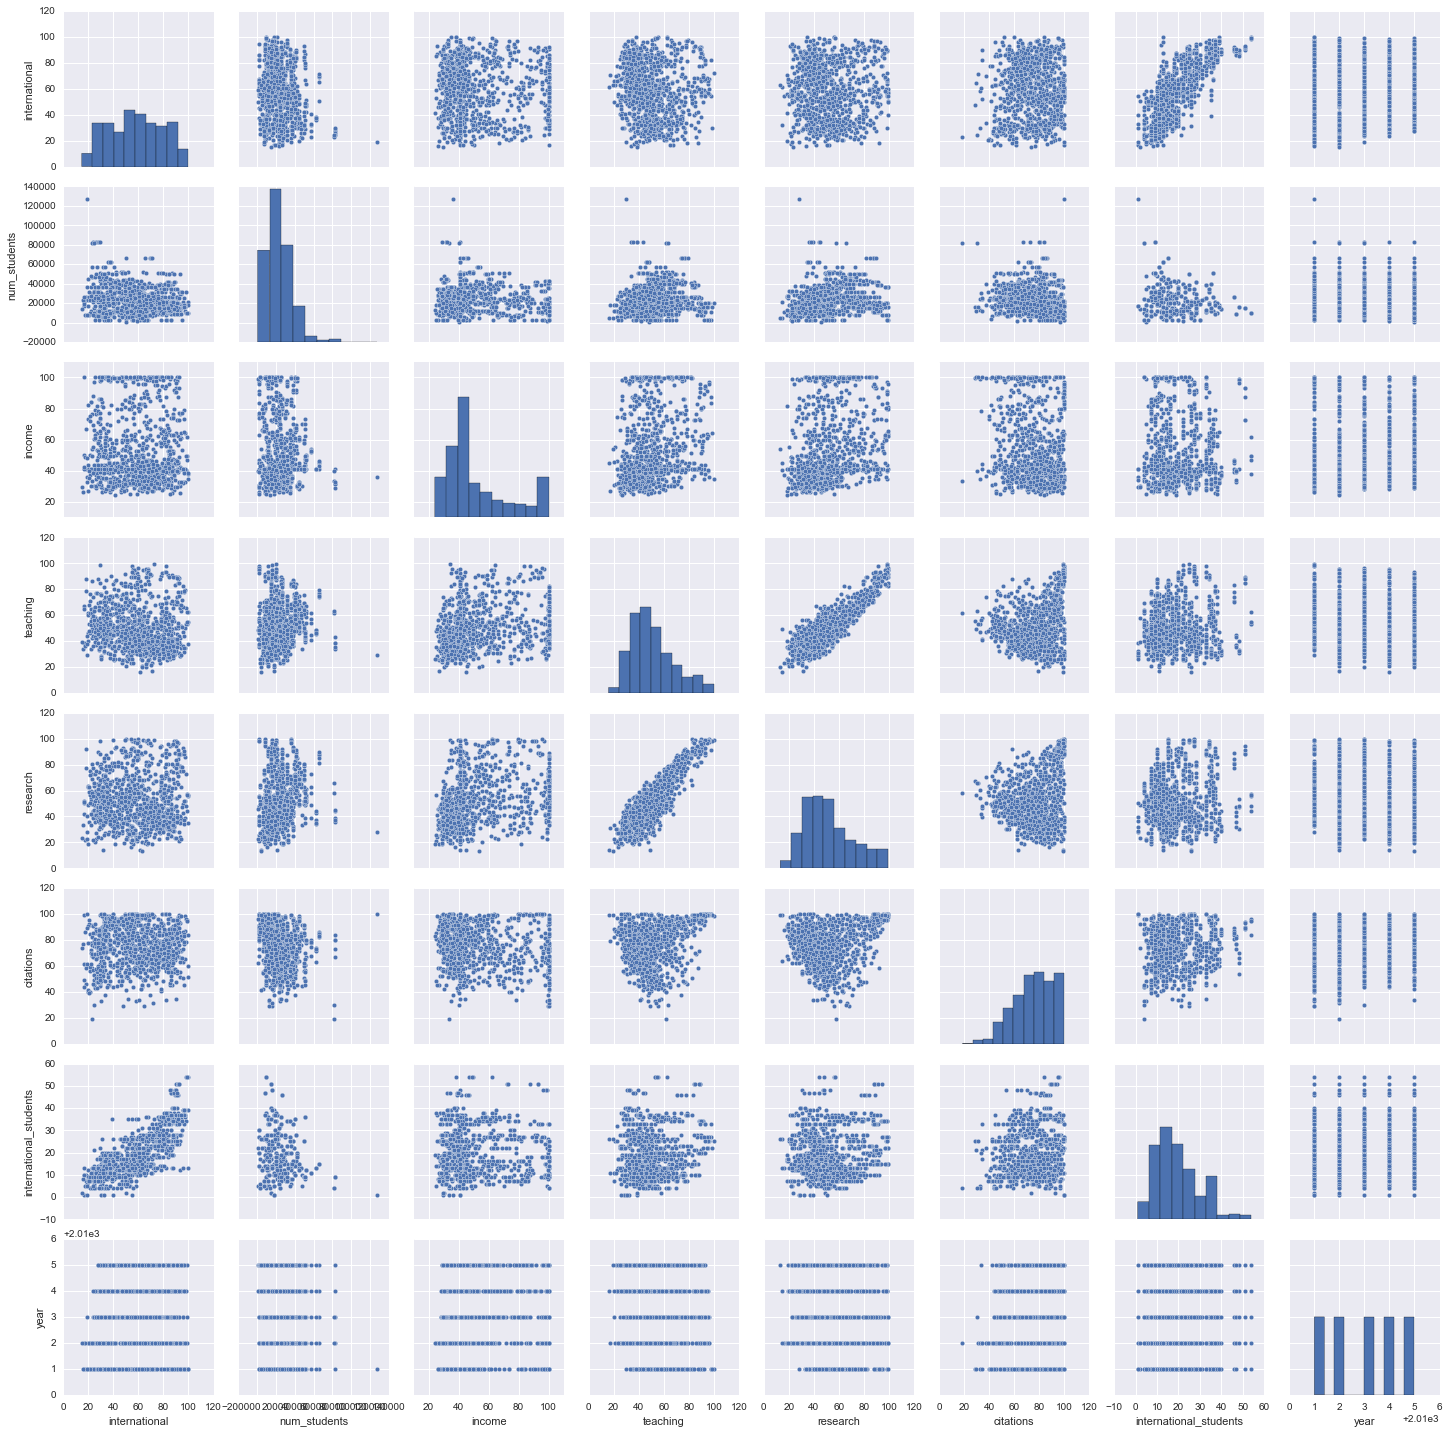

In [143]:
sns.pairplot(dfc_X)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1602
Data columns (total 9 columns):
international             1001 non-null float64
num_students              1001 non-null float64
income                    1001 non-null float64
teaching                  1001 non-null float64
research                  1001 non-null float64
citations                 1001 non-null float64
international_students    1001 non-null float64
total_score               1001 non-null object
year                      1001 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1803 to 2602
Data columns (total 8 columns):
international             800 non-null float64
num_students              800 non-null float64
income                    800 non-null float64
teaching                  800 non-null float64
research                  800 non-null float64
citations                 800 non-null float64
internationa

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


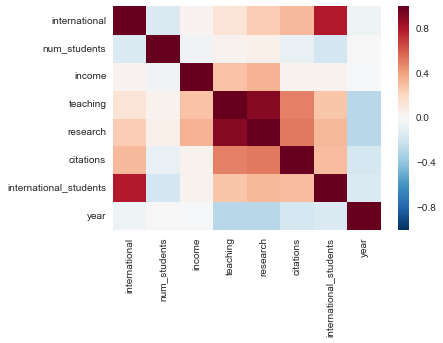

In [124]:
cols = ['international','num_students','income', 'teaching', 'research', 'citations', \
        'international_students', 'total_score', 'year']
df2 = dfc.copy()[cols]
dfc_X = df2[(df2['total_score'] != '-') & (df2['total_score'].notnull())]
dfc_X.info()


dfc_u_2016 = dfc.copy()
dfc_u_2016 = dfc_u_2016['university_name'][(dfc_u_2016['year'] == 2016)]
dfc_train = dfc_X['total_score'].astype(float)
dfc_X.drop('total_score', axis=1, inplace=True)


dfc_X_2016 = df2[(df2['year'] == 2016)]
dfc_X_2016 =dfc_X_2016.drop('total_score', axis =1)
dfc_X_2016.info()
print dfc_X_2016['year'].unique()
#print dfc_X.dtypes
# train_cols = ['total_score']
# train = dfc_train.copy()[train_cols]

 
#print df2
sns.heatmap(df2.corr())

In [125]:
X = dfc_X
y =  dfc_train

lr = linear_model.LinearRegression()
lr_model = lr.fit(X,y)

y_pred = lr_model.predict(dfc_X_2016)
y_pred_df =  pd.DataFrame(y_pred)
pred = pd.Series(y_pred)

In [127]:
new = pd.concat([dfc_u_2016, dfc_X_2016],axis=1)
new.reset_index(drop=True, inplace=True)

In [136]:
pred_df = pred.to_frame('pred_score')
result_df = pd.concat([new,pred_df], axis = 1)
#result_df

"""dfLeft.reset_index(inplace=True)
dfRight.reset_index(inplace=True)
dfMerged = pd.merge(dfLeft, dfRight,
              left_on=['date', 'cusip'],
              right_on=['date', 'idc__id'],
              how='inner')
"""
dfLeft = dfs
dfRight = result_df
dfMerged = pd.merge(dfLeft, dfRight,
              left_on=['university_name'],
              right_on=['university_name'],
              how='inner')
dfMerged.info() 
dfs.info()
dfMerged.to_csv("/users/kristensu/Desktop/university_preds_SKJP.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 12 columns):
world_rank                800 non-null object
university_name           800 non-null object
total_score               0 non-null float64
international             800 non-null float64
num_students              800 non-null float64
income                    800 non-null float64
teaching                  800 non-null float64
research                  800 non-null float64
citations                 800 non-null float64
international_students    800 non-null float64
year                      800 non-null int64
pred_score                800 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 81.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
world_rank         800 non-null object
university_name    800 non-null object
total_score        0 non-null float64
dtypes: float64(1), object(2)
memory usage: 18.8+ KB


In [76]:
type(pred)

pandas.core.series.Series

In [77]:
y.dtype

dtype('float64')

In [78]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null int64
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null float64
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null float64
total_score               1803 non-null object
num_students              2603 non-null float64
student_staff_ratio       2603 non-null float64
international_students    2603 non-null float64
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(8), int64(2), object(4)
memory usage: 284.8+ KB


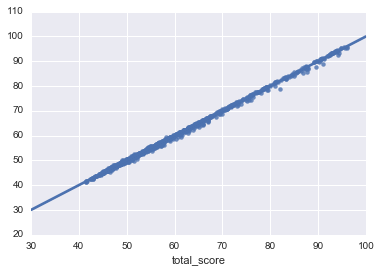

In [79]:
sns.regplot(x=y, y=y_pred)

In [80]:
dfs.head()

,world_rank,university_name,total_score
0,1,California Institute of Technology,NaN
1,2,University of Oxford,NaN
2,3,Stanford University,NaN
3,4,University of Cambridge,NaN
4,5,Massachusetts Institute of Technology,NaN


In [81]:
dfc.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,41.0,94.2,7929.0,8.4,27.0,45:55:00,2011


In [137]:
dfc

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,41.0,94.2,7929.0,8.4,27.0,45:55:00,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34.0,46:54:00,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919.0,11.6,34.0,46:54:00,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,41.0,91.1,36186.0,16.4,15.0,50:50:00,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,15060.0,11.7,51.0,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,41.0,89.5,11751.0,4.4,20.0,50:50:00,2011
